In [ ]:
## Load Data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
## import module
import matplotlib.pyplot as plt
import pandas as pd

## Load Data
mamm_feature_week = pd.read_csv("/content/drive/MyDrive/[AM.SWU] 강남구 POS 데이터 매출 예측/processedData/매머드_주중_feature_clustered_실패.csv", index_col =False)

print(mamm_feature_week.shape)

(1125, 13)


In [ ]:
mamm_feature_week

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,실패여부,평균생활인구수_cl,상업지역 면적_cl
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35,1,중,상
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38,1,상,상
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32,1,상,상
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71,0,중,상
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44,1,상,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55,1,중,하
1121,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97,0,중,하
1122,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65,0,상,하
1123,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54,0,상,하


In [ ]:
mamm_feature_week[(mamm_feature_week["실패여부"]==1) & (mamm_feature_week["상업지역 면적_cl"]=="하")]

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,실패여부,평균생활인구수_cl,상업지역 면적_cl
51,S53680_20190201_3,S53680,MMTH 강남1호,2019-02-01,0,3.0,107691.93,141473.73,13625.0,963.08,1,상,하
52,S53680_20190201_4,S53680,MMTH 강남1호,2019-02-01,0,4.0,107691.93,94376.66,17000.0,1801.29,1,중,하
55,S53680_20190207_3,S53680,MMTH 강남1호,2019-02-07,0,3.0,107691.93,149448.64,17000.0,1137.51,1,상,하
56,S53680_20190207_4,S53680,MMTH 강남1호,2019-02-07,0,4.0,107691.93,93537.36,18500.0,1977.82,1,중,하
57,S53680_20190208_1,S53680,MMTH 강남1호,2019-02-08,0,1.0,107691.93,107021.21,47360.0,4425.29,1,중,하
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,T64222_20190222_3,T64222,MMTH 역삼GFC점,2019-02-22,0,3.0,103356.25,128520.26,50650.0,3941.01,1,상,하
1111,T64222_20190225_3,T64222,MMTH 역삼GFC점,2019-02-25,0,3.0,103356.25,130195.36,64025.0,4917.61,1,상,하
1115,T64222_20190226_3,T64222,MMTH 역삼GFC점,2019-02-26,0,3.0,103356.25,143386.97,62050.0,4327.45,1,상,하
1119,T64222_20190227_3,T64222,MMTH 역삼GFC점,2019-02-27,0,3.0,103356.25,140615.58,68525.0,4873.22,1,상,하


In [ ]:
## Prepare the dataset
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

feature_col = ["시간대구분","상업지역 면적","평균생활인구수"]
rs = 42

def prepare_data(data):

  # 시간대구분, 주중/주말	원핫인코딩
  X = data.loc[:,feature_col]
  y = data["실패여부"]

  # split into train/test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs ,stratify = y)

  num_attributes = ["평균생활인구수","상업지역 면적"]
  cat_attributes = ["시간대구분"]

  feature_pipeline = ColumnTransformer([
      ("num", StandardScaler(), num_attributes),
      ("cat", OneHotEncoder(), cat_attributes)
  ])

  X_train_transformed = feature_pipeline.fit_transform(X_train)
  X_test_transformed = feature_pipeline.transform(X_test)
  return X_train_transformed, y_train, X_test_transformed, y_test, feature_pipeline

In [ ]:
## plotting을 위한 함수 
from sklearn.metrics import confusion_matrix

# confusion matrix plotting 함수
def plot_confusion_matrix(y_test, y_pred, plot_title):
    # 혼동행렬 시각화)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns = ["나머지", "실패"], index = ["나머지", "실패"])

    #Plotting the confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix - '+plot_title)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from numpy import average
import seaborn as sns
import pandas as pd

# 모델 평가를 위한 metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## 모델 수행 코드
def model_execution(model, plot_title, x_train, y_train, x_test, y_test):

    # 모델 학습
    model.fit(x_train, y_train)
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # 다중 분류이기 때문에 평균으로 냄
    test_acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}") # 정확도
    print(f"Precision: {precision:.3f}") # 정밀도
    print(f"Recall: {recall:.3f}") # 재현율
    print(f"F1-score: {f1:.3f}") # F1 스코어
    
    # confusion-matrix plot
    plot_confusion_matrix(y_test, y_pred, plot_title)
    return model

In [ ]:
# Preprocessed and Split data into trainset, testset
X_train, y_train, X_test, y_test, feature_pipeline = prepare_data(mamm_feature_week)

X_transformed = feature_pipeline.fit_transform(mamm_feature_week.loc[:,["시간대구분","상업지역 면적","평균생활인구수"]])
X_transformed_ = pd.DataFrame(X_transformed, columns= list(feature_pipeline.get_feature_names_out(["시간대구분","상업지역 면적","평균생활인구수"])))
X_transformed_.columns = ["COMMERCIAL_AREA", "DE_FACTO_POPULATION", "Open", "Middle1", "Middle2", "Closing"]


print(X_train.shape, X_test.shape)

(843, 6) (282, 6)


In [ ]:
list(feature_pipeline.get_feature_names_out(["시간대구분","상업지역 면적","평균생활인구수"]))

['num__평균생활인구수',
 'num__상업지역 면적',
 'cat__시간대구분_1.0',
 'cat__시간대구분_2.0',
 'cat__시간대구분_3.0',
 'cat__시간대구분_4.0']

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

import shap

X_train_ = pd.DataFrame(X_train, columns= list(feature_pipeline.get_feature_names_out(["시간대구분","상업지역 면적","평균생활인구수"])))
X_test_ = pd.DataFrame(X_test, columns= list(feature_pipeline.get_feature_names_out(["시간대구분","상업지역 면적","평균생활인구수"])))

X_train_.columns = ["COMMERCIAL_AREA", "DE_FACTO_POPULATION", "Open", "Middle1", "Middle2", "Closing"]
X_test_.columns = ["COMMERCIAL_AREA", "DE_FACTO_POPULATION", "Open", "Middle1", "Middle2", "Closing"]

## Feature Importance
Optimized_parameters = {'n_estimators': 143, 'num_leaves': 6, 'max_depth': 5, 'min_child_samples': 10, 'learning_rate': 0.06700956080926035, 'objective':'binary', 'metric':'binary_logloss'}
model = LGBMClassifier(**Optimized_parameters).fit(X_train_, y_train)

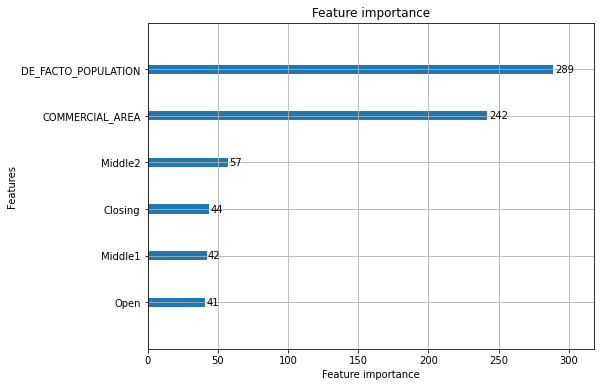

In [ ]:
## 기존 lgbm에서 제공하는 feature importance plot
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(8,6))
plot_importance(model, ax=ax)
plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
#25408e
#3e4189
#574185
#704280
#8a437b
#a34476
#bc4472
#d5456d
# ["#25408e","#41397d","#5d336d","#792c5c","#96264c","#b21f3b","#ce192b","#EA121A"]
#  ["#25408e","#3e4189","#574185","#704280","#8a437b","#a34476","#bc4472","#d5456d"]

colors =["#25408e","#41397d","#5d336d","#792c5c","#96264c","#b21f3b","#ce192b","#EA121A"]
mycmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=2)

mycmap2 = LinearSegmentedColormap.from_list('',["#25408e","#EA121A"])

In [ ]:
# get shap values
"""
explainer = shap.Explainer(model, X_train_)
shap_values = explainer(X_train_)
"""

# waterfall plot for first observation
# shap.plots.waterfall(explainer.expected_value[1], shap_values[1][0,:], X_train_.iloc[0,:])

shap.initjs()
data = X_transformed_

# compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


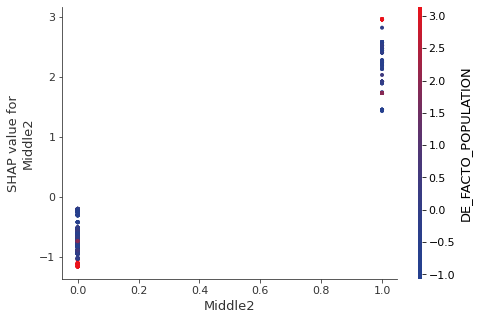

In [ ]:
shap.dependence_plot("Middle2", shap_values[1], data, interaction_index="DE_FACTO_POPULATION", cmap=plt.get_cmap(mycmap))

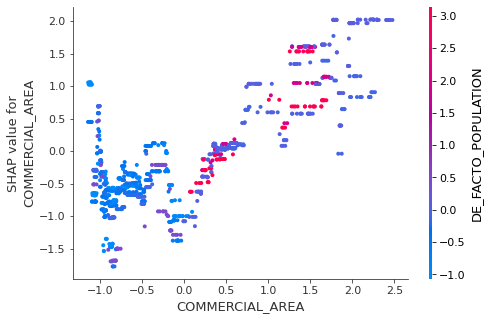

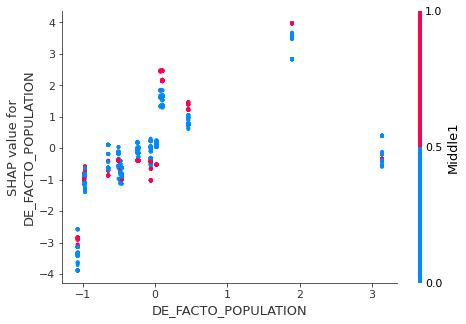

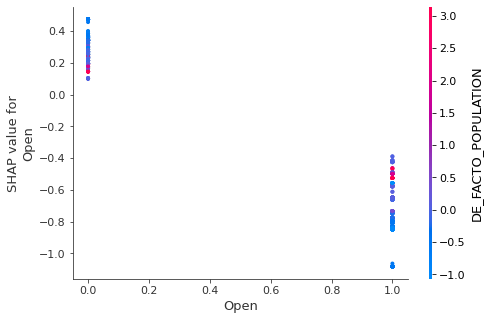

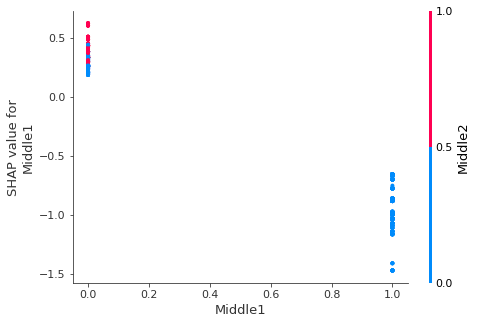

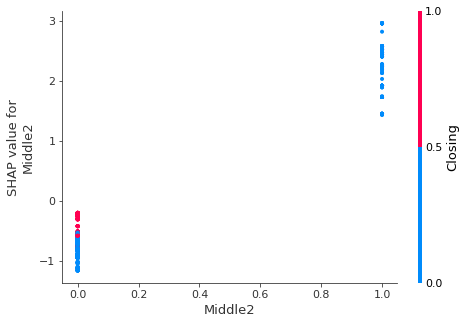

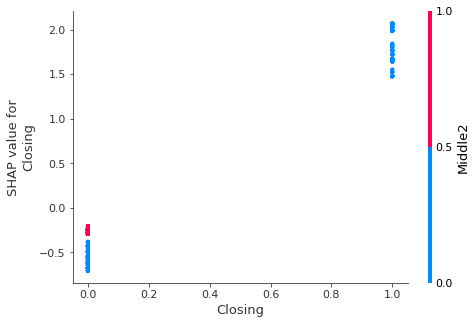

In [ ]:
for name in X_train_.columns:
    shap.dependence_plot(name, shap_values[1], data, data.columns)

In [ ]:
mycmap2

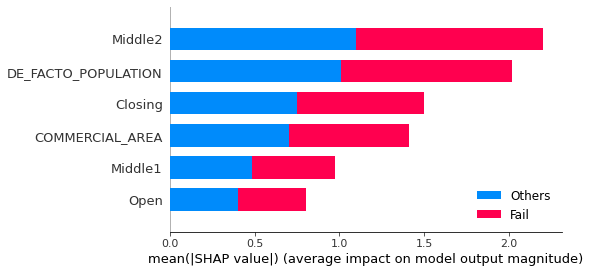

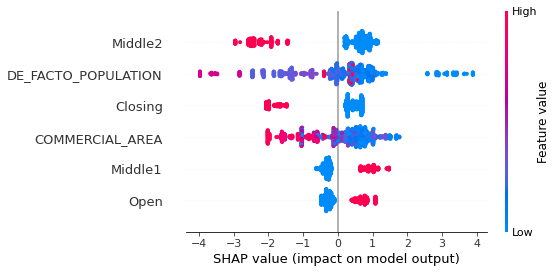

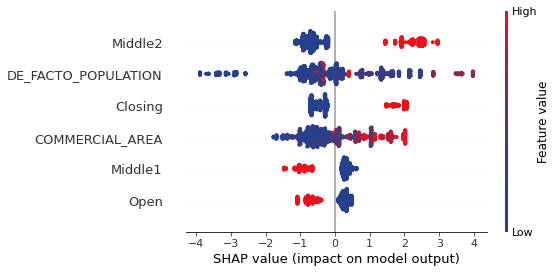

In [ ]:
# obtain shap values for the whole data
## 전체 Feature들에 대한 shapley value가 어떠한 분포를 미치는지 시각화 함
## Featue Importance와 Feature Effect를 결합한 Plot
# 빨간색: Feature 값 높음, 파란색: Feature 값 낮음
# x축 0을 기준으로 음의 영역: 부정적 요인, 양의 영역: 긍정적 요인 
mycmap2 = LinearSegmentedColormap.from_list('',["#25408e","#EA121A"])

shap.summary_plot(shap_values, data, class_names= ["Others","Fail"] , cmap=LinearSegmentedColormap.from_list("a",["#25408e","#EA121A"]))
shap.summary_plot(shap_values[0], data)
shap.summary_plot(shap_values[1], data, cmap=plt.get_cmap(mycmap))